**IMPORTING** **LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

**IMPORTING DATASET**

In [ ]:
X = pd.read_csv('DrugEffects.csv').drop(columns=['Unnamed: 0'])
X

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...
3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects


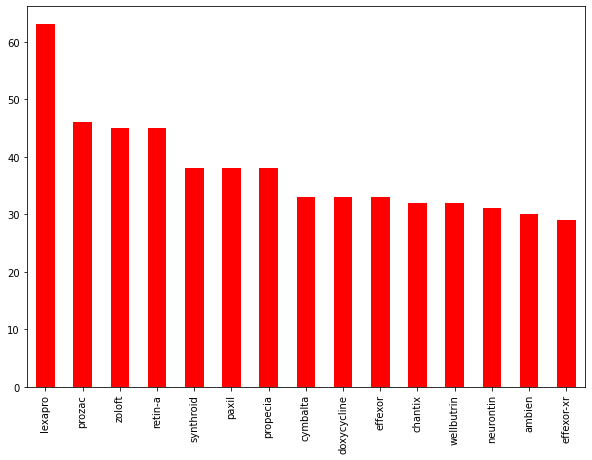

In [ ]:
X['urlDrugName'].value_counts().head(15).plot(kind='bar',color='red')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [ ]:
#Drug Rating

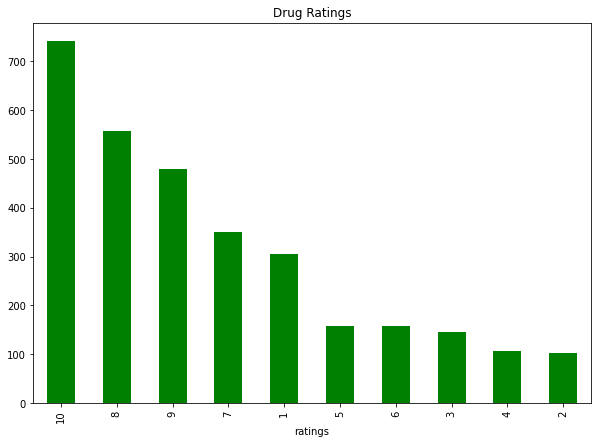

In [ ]:
X['rating'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Drug Ratings')
plt.xlabel('ratings')
plt.show()

In [ ]:
#Effectiveness of the Drugs

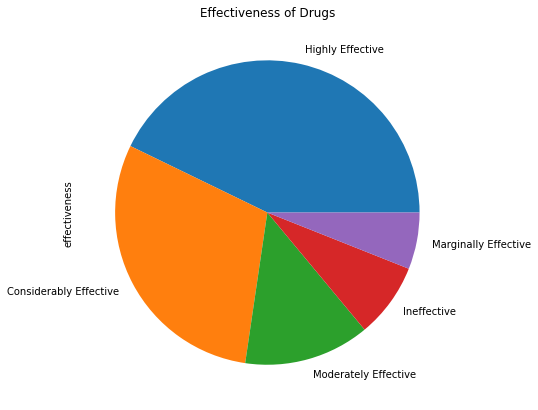

In [ ]:
effective = X['effectiveness'].value_counts()
plt.title('Effectiveness of Drugs')
effective.plot(kind='pie')
plt.show()

In [ ]:
#Condition of medicine cures

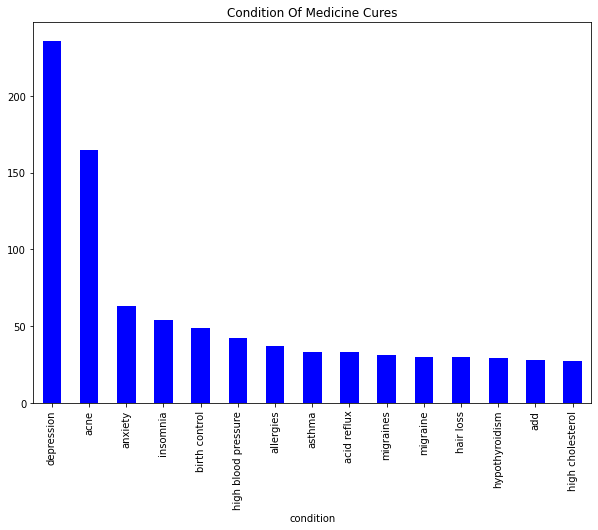

In [ ]:
X['condition'].value_counts().head(15).plot(kind='bar',color='blue')
plt.title('Condition Of Medicine Cures')
plt.xlabel('condition')
plt.show()

In [ ]:
#Data cleaning

In [ ]:
y = X.pop('sideEffects')
y.head()

0      Mild Side Effects
1    Severe Side Effects
2        No Side Effects
3      Mild Side Effects
4    Severe Side Effects
Name: sideEffects, dtype: object

In [ ]:
columns = ['urlDrugName','effectiveness','condition']
for i in columns:
    X[i] = pd.factorize(X[i])[0]
    
y = pd.factorize(y)[0]

In [ ]:
X

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4
...,...,...,...,...
3102,6,10,0,27
3103,95,1,2,7
3104,185,2,1,1425
3105,501,8,3,116


In [ ]:
y = y.reshape(len(y),1)
y

array([[0],
       [1],
       [2],
       ...,
       [4],
       [0],
       [4]])

In [ ]:
#Splitting the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#using SVM
from sklearn.svm import SVC

svm_clf=SVC().fit(X_train,y_train)

svm_pred=svm_clf.predict(X_test)

print(classification_report(y_test,svm_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.60      0.54       315
           1       0.41      0.33      0.36       107
           2       0.58      0.61      0.60       261
           3       0.39      0.55      0.46        47
           4       0.49      0.31      0.38       203

    accuracy                           0.50       933
   macro avg       0.47      0.48      0.47       933
weighted avg       0.50      0.50      0.50       933



In [ ]:
#using random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier().fit(X_train,y_train)

rf_pred=rf_clf.predict(X_test)

print(classification_report(y_test,rf_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.47      0.48      0.47       315
           1       0.28      0.26      0.27       107
           2       0.54      0.57      0.56       261
           3       0.36      0.45      0.40        47
           4       0.41      0.37      0.39       203

    accuracy                           0.45       933
   macro avg       0.41      0.43      0.42       933
weighted avg       0.45      0.45      0.45       933



In [ ]:
# using decision tree 
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
prediction=clf.predict(X_test)

In [ ]:
prediction

array([2, 0, 2, 0, 3, 1, 0, 0, 0, 4, 0, 2, 4, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 2,
       2, 4, 4, 2, 4, 1, 1, 3, 0, 2, 4, 0, 1, 1, 4, 4, 0, 2, 4, 4, 2, 0,
       0, 3, 0, 0, 4, 4, 2, 2, 0, 2, 0, 0, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 4, 0, 2, 2, 4, 4, 2, 4, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 4,
       1, 0, 2, 2, 4, 0, 2, 2, 2, 0, 4, 0, 3, 4, 0, 1, 4, 2, 2, 4, 0, 3,
       2, 0, 2, 0, 0, 4, 4, 0, 1, 0, 0, 0, 4, 0, 2, 1, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 4, 0, 2, 2, 0, 2, 4, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 0, 2, 4, 2, 1, 2, 3, 2, 2, 1, 2, 1, 4, 4, 4, 4, 4, 4, 0, 1,
       4, 0, 1, 4, 2, 0, 4, 0, 4, 4, 4, 4, 0, 1, 4, 0, 4, 1, 0, 2, 0, 1,
       1, 0, 2, 4, 2, 2, 2, 4, 0, 0, 2, 4, 3, 0, 1, 0, 1, 0, 2, 1, 2, 0,
       0, 0, 0, 2, 2, 2, 4, 2, 0, 4, 0, 0, 2, 4, 1, 1, 0, 2, 2, 2, 3, 1,
       4, 0, 0, 2, 2, 0, 4, 3, 4, 1, 0, 0, 2, 4, 2, 4, 0, 0, 4, 1, 2, 3,
       2, 1, 4, 0, 0, 0, 1, 2, 0, 2, 0, 2, 3, 3, 1,

[Text(279.0, 348.81, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 285.39, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(321.9230769230769, 285.39, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(171.69230769230768, 221.97, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(85.84615384615384, 158.55, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(42.92307692307692, 95.13, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 158.55, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(214.61538461538458, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.46153846153845, 95.13, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(257.53846153846155, 31.710000000000036, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(3

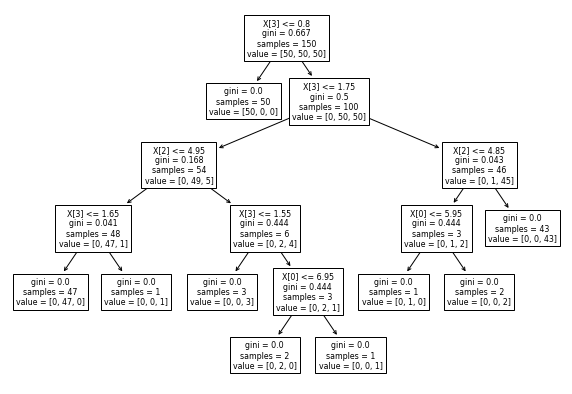

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df,target = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df, target)
tree.plot_tree(clf) 

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,log_reg_pred)
print(cm)
accuracy_score(y_test,log_reg_pred)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0 17]]


0.9736842105263158

**KNearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,knn_pred)
print(cm)
accuracy_score(y_test,knn_pred)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  2 15]]


0.9473684210526315

**SVC (rbf)**

In [ ]:
from sklearn.svm import SVC
svm_nl_classifier = SVC(kernel='rbf')
svm_nl_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_nl_pred = svm_nl_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,svm_nl_pred)
print(cm)
accuracy_score(y_test,svm_nl_pred)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1 16]]


0.9736842105263158

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naive_pred = naive_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,naive_pred)
print(cm)
accuracy_score(y_test,naive_pred)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0 17]]


0.9736842105263158

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
decision_pred = decision_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,decision_pred)
print(cm)
accuracy_score(y_test,decision_pred)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1 16]]


0.9736842105263158

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:

random_pred = random_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,random_pred)
print(cm)
accuracy_score(y_test,random_pred)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  1 16]]


0.9473684210526315

**SVM (Linear)**

In [ ]:
from sklearn.svm import SVC
svm_l_classifier = SVC(kernel='linear')
svm_l_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_l_pred = svm_l_classifier.predict(X_test)
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(y_test,svm_l_pred)
print(cm)
accuracy_score(y_test,svm_l_pred)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0 17]]


1.0

In [ ]:
print(classification_report(y_test,svm_l_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        17

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

